In [1]:
import os
data_list = os.listdir("CatDog/training_set/training_set/")
print(data_list)

['cats', 'dogs']


In [2]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions, VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

In [3]:
train_datasets = "CatDog/training_set/training_set/"
test_datasets = "CatDog/test_set/test_set/"

In [4]:
image_size = (150,150)
number_class = len(data_list)
batch_size = 10
number_epochs = 10
learningRate = 0.001

In [5]:
train_dataset_generator = ImageDataGenerator(rescale = 1./255, #range = [0, 1]
                                            rotation_range = 45,
                                            featurewise_center = True,
                                            featurewise_std_normalization = True,
                                            height_shift_range=0.2,
                                            width_shift_range=0.2,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            channel_shift_range = 20,
                                            horizontal_flip = True,
                                            vertical_flip = True,
                                            validation_split = 0.2, 
                                            fill_mode="constant")

In [6]:
train_batches = train_dataset_generator.flow_from_directory(train_datasets,
                                                           target_size= image_size,
                                                           shuffle=True,
                                                           batch_size=batch_size,
                                                           subset='training',
                                                           seed=42,
                                                           class_mode = "binary")

Found 6407 images belonging to 2 classes.


In [7]:
validation_batches = train_dataset_generator.flow_from_directory(train_datasets,
                                                           target_size= image_size,
                                                           shuffle=True,
                                                           batch_size=batch_size,
                                                           subset='validation',
                                                           seed=42,
                                                           class_mode = "binary")

Found 1601 images belonging to 2 classes.


In [8]:
vgg_model = VGG16(weights="imagenet",
                 include_top = False,
                 input_shape=(150, 150, 3))

vgg_model.trainable = False

2022-03-25 15:48:12.600953: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-25 15:48:12.603888: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy',
             optimizer = Adam(learning_rate = learningRate), 
             metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
print(len(train_batches))
print()
print(len(validation_batches))

641

161


In [13]:
print(train_batches.n)
print()
print(validation_batches.n)

6407

1601


In [14]:
print(train_batches.batch_size)
print()
print(validation_batches.batch_size)

10

10


In [15]:
train_step_size = train_batches.n // train_batches.batch_size
validation_step_size = validation_batches.n //validation_batches.batch_size

In [16]:
model_runing_history = model.fit(train_batches, 
                                steps_per_epoch = train_step_size,
                                validation_data=validation_batches,
                                validation_steps=validation_step_size,
                                epochs = number_epochs)

/opt/anaconda3/envs/Opencv/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/anaconda3/envs/Opencv/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
2022-03-25 15:50:57.134092: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 86 of 641
2022-03-25 15:51:07.162635: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 174 of 641
2022-03-25 15:51:17.121355: I tensorflow/core/kernel

Train for 640 steps, validate for 160 steps
Epoch 1/10


/opt/anaconda3/envs/Opencv/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/anaconda3/envs/Opencv/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
2022-03-25 15:54:23.590636: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 83 of 641
2022-03-25 15:54:33.566135: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 168 of 641
2022-03-25 15:54:43.650727: I tensorflow/core/kernel

640/640 [==============================] - 7406s 12s/step - loss: 0.5667 - accuracy: 0.7383 - val_loss: 0.4635 - val_accuracy: 0.7750
Epoch 2/10


2022-03-25 17:57:45.487956: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 91 of 641
2022-03-25 17:57:55.413315: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 180 of 641
2022-03-25 17:58:05.413803: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 265 of 641
2022-03-25 17:58:15.409748: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 341 of 641
2022-03-25 17:58:25.521428: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 405 of 641
2022-03-25 17:58:35.422478: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 449 of 641
2022-03-25 17:58:45.462605: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (

640/640 [==============================] - 96648s 151s/step - loss: 0.4624 - accuracy: 0.7740 - val_loss: 0.4552 - val_accuracy: 0.7731
Epoch 3/10


2022-03-26 20:48:33.349929: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 91 of 641
2022-03-26 20:48:43.325151: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 182 of 641
2022-03-26 20:48:53.344157: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 273 of 641
2022-03-26 20:49:03.270421: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 361 of 641
2022-03-26 20:49:13.393429: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 438 of 641
2022-03-26 20:49:23.325757: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 513 of 641
2022-03-26 20:49:33.322448: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (

640/640 [==============================] - 90003s 141s/step - loss: 0.4268 - accuracy: 0.7994 - val_loss: 0.4371 - val_accuracy: 0.7844
Epoch 4/10


2022-03-27 21:48:36.150740: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 88 of 641
2022-03-27 21:48:46.066821: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 166 of 641
2022-03-27 21:48:56.070112: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 242 of 641
2022-03-27 21:49:06.133280: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 322 of 641
2022-03-27 21:49:16.119945: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 392 of 641
2022-03-27 21:49:26.058026: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 458 of 641
2022-03-27 21:49:36.242111: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (

640/640 [==============================] - 4598s 7s/step - loss: 0.4246 - accuracy: 0.7982 - val_loss: 0.4262 - val_accuracy: 0.7900
Epoch 5/10


2022-03-27 23:05:13.723938: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 88 of 641
2022-03-27 23:05:23.659620: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 173 of 641
2022-03-27 23:05:33.680148: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 260 of 641
2022-03-27 23:05:43.699261: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 347 of 641
2022-03-27 23:05:53.633077: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 417 of 641
2022-03-27 23:06:03.689563: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 485 of 641
2022-03-27 23:06:13.704025: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (

640/640 [==============================] - 38004s 59s/step - loss: 0.4367 - accuracy: 0.7965 - val_loss: 0.3999 - val_accuracy: 0.8100
Epoch 6/10


2022-03-28 09:38:37.546112: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 84 of 641
2022-03-28 09:38:47.536561: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 163 of 641
2022-03-28 09:38:57.431582: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 244 of 641
2022-03-28 09:39:07.473868: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 326 of 641
2022-03-28 09:39:17.442792: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 388 of 641
2022-03-28 09:39:27.449571: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 461 of 641
2022-03-28 09:39:40.540960: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (

640/640 [==============================] - 3749s 6s/step - loss: 0.4113 - accuracy: 0.8096 - val_loss: 0.4059 - val_accuracy: 0.8069
Epoch 7/10


2022-03-28 10:41:06.092902: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 84 of 641
2022-03-28 10:41:16.140565: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 168 of 641
2022-03-28 10:41:26.179056: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 250 of 641
2022-03-28 10:41:36.174995: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 332 of 641
2022-03-28 10:41:46.088729: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 413 of 641
2022-03-28 10:41:56.233729: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 485 of 641
2022-03-28 10:42:06.128762: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (

640/640 [==============================] - 3690s 6s/step - loss: 0.4110 - accuracy: 0.8090 - val_loss: 0.4106 - val_accuracy: 0.8112
Epoch 8/10


2022-03-28 11:42:35.973020: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 87 of 641
2022-03-28 11:42:45.923091: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 168 of 641
2022-03-28 11:42:55.931538: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 241 of 641
2022-03-28 11:43:05.977727: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 319 of 641
2022-03-28 11:43:15.907627: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 397 of 641
2022-03-28 11:43:25.969875: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 469 of 641
2022-03-28 11:43:36.028068: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (

640/640 [==============================] - 3866s 6s/step - loss: 0.4067 - accuracy: 0.8126 - val_loss: 0.3932 - val_accuracy: 0.8281
Epoch 9/10


2022-03-28 12:47:02.164738: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 83 of 641
2022-03-28 12:47:12.101889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 152 of 641
2022-03-28 12:47:22.205178: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 229 of 641
2022-03-28 12:47:32.110425: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 304 of 641
2022-03-28 12:47:42.106670: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 379 of 641
2022-03-28 12:47:52.188234: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 431 of 641
2022-03-28 12:48:02.192130: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (

640/640 [==============================] - 3836s 6s/step - loss: 0.4057 - accuracy: 0.8119 - val_loss: 0.3901 - val_accuracy: 0.8275
Epoch 10/10


2022-03-28 13:50:57.698918: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 88 of 641
2022-03-28 13:51:07.694087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 177 of 641
2022-03-28 13:51:17.716612: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 239 of 641
2022-03-28 13:51:27.693613: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 319 of 641
2022-03-28 13:51:37.712722: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 393 of 641
2022-03-28 13:51:47.832982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 441 of 641
2022-03-28 13:51:57.933695: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (

640/640 [==============================] - 3906s 6s/step - loss: 0.4044 - accuracy: 0.8077 - val_loss: 0.4084 - val_accuracy: 0.7931


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

def acc_lossPLT(model_data, epochs):

    acc = model_data.history['accuracy']
    loss = model_data.history['loss']
    val_acc = model_data.history['val_accuracy']
    val_loss = model_data.history['val_loss']
    
    plt.figure(figsize = (10, 5))
    plt.subplot(121)
    plt.plot(range(1, epochs), acc[1:], label = 'Training Accuracy')
    plt.plot(range(1, epochs), val_acc[1:], label = 'Validation Accuracy')
    plt.title("Accuracy Over" + str(epochs) + " Epochs " , size = 15)
    plt.tight_layout()
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize = (10, 5))
    plt.subplot(122)
    plt.plot(range(1, epochs), loss[1:], label = 'Training loss')
    plt.plot(range(1, epochs), val_loss[1:], label = 'Validation loss')
    plt.title("Loss Over" + str(epochs) + " Epochs " , size = 15)
    plt.tight_layout()
    plt.legend()
    plt.grid(True)

    plt.show()

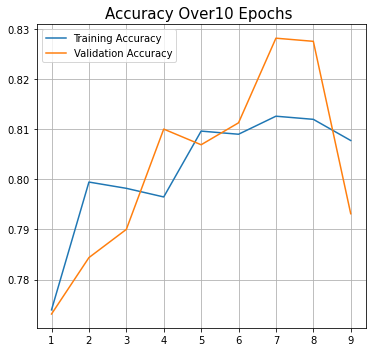

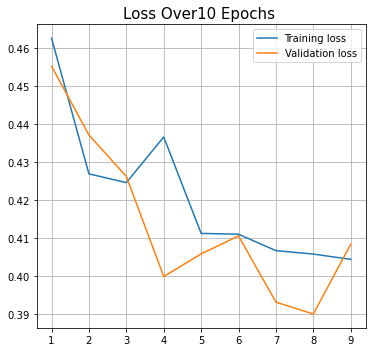

In [21]:
acc_lossPLT(model_runing_history, 10)

In [22]:
model.save("ClassificationModel.h5")

In [23]:
test_datagenrator = ImageDataGenerator(rescale=1./255)
test_batches = test_datagenrator.flow_from_directory(test_datasets,
                                       target_size= image_size,
                                       shuffle=False,
                                       batch_size=1,
                                       seed=42,
                                       class_mode = "binary")

test_batches.reset()

Found 2023 images belonging to 2 classes.


In [24]:
test_batches.reset()
random_data = model.evaluate(test_batches,
                            steps = int(np.ceil(len(test_batches) / batch_size)), 
                            use_multiprocessing = False,
                            verbose = 1,
                            workers = 1)                             

203/203 [==============================] - 100s 494ms/step - loss: 0.5534 - accuracy: 0.7438


In [25]:
print("TestDatasets Loss: ", random_data[0])
print("TestDatasets Accuracy: ", random_data[1])

TestDatasets Loss:  0.5534181584049481
TestDatasets Accuracy:  0.74384236


In [27]:
test_batches.reset()
predictted = model.predict(test_batches,
                           batch_size = None, 
                           verbose=1)

2023/2023 [==============================] - 985s 487ms/step
